### Import Necessary Libraries

Import numpy for defining variables for the logical operations.<br>
Import matplotlib for visualizing the plots of the XOR logic operation results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Define the combinational inputs for the XOR operation and the results too.

In [3]:
# Define the input data (X) and the corresponding XOR results (Y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

Plot the XOR operation results.

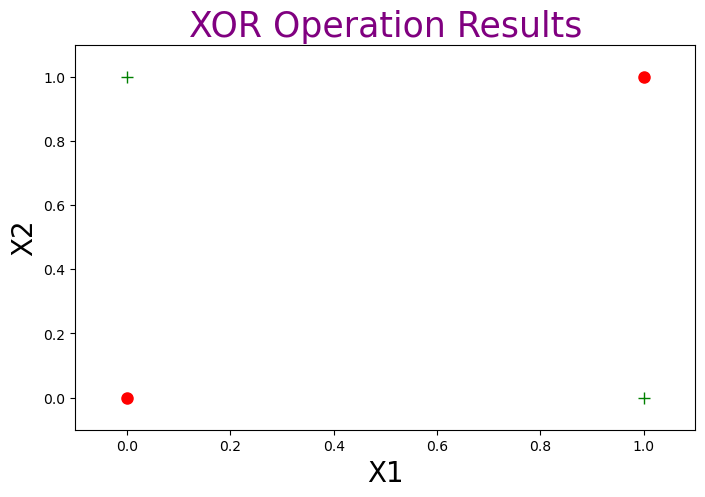

In [15]:
# Plot the results of XOR operations
plt.figure(figsize=(8,5))

# Plot the data points
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X[i, 0], X[i, 1], 'ro', markersize=8)
    else:
        plt.plot(X[i, 0], X[i, 1], '+g', markersize=8)

plt.xlabel("X1", size = 20)
plt.ylabel("X2", size = 20)
plt.title("XOR Operation Results", size = 25, color="purple")
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

### Neural Network Architecture

Define the neural network architecture by defining the - <i> Input Layer Neurons, Hidden Layer Neurons, and Output Layer Neurons.</i><br>
Here, 2 neurons used for Input layer, 2 neurons for a single hidden layer and 1 neuron for the output layer will be used.

In [8]:
# Define the neural network architecture
input_size = 2
hidden_size = 2
output_size = 1

Randomly initialize the Weights and biases for the Neural Network.

In [9]:
# Initialize the weights and biases with random values
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(output_size)

### Activation Function Definition

Here two method for the sigmoid function has been defined. One is for the feed forward propagation and the derivative of the sigmoid function for the Back-propagation.

In [10]:
# Define the activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

### Neural Network Model Building - Forward and Backwork Propagation

<b>The Forward Propagation:</b> Here the Sigmoid activation function will be used to calculate the outputs of Hidden Layer and Output Layer's weighted sum.<br>
<b>Loss Calculation:</b> The loss for each epoch will be calculated here by considering the accuracy according to the output results.<br> 
<b>The Backward Propagation:</b> Here the sigmoid_derivative function will be used to calculate errors in each outputs of both hidden layers and output layers. It will also calculate the small changes for each updates to balance the weights and biases.<br>
<br>
After propagating, the weights and biases will be updated after epochs.

In [11]:
# Train the neural network for a specified number of epochs
epochs = 10000
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_output = sigmoid(np.dot(X, W1) + b1)
    output_layer_output = sigmoid(np.dot(hidden_layer_output, W2) + b2)

    # Calculate the loss (accuracy-based)
    accuracy = np.mean(np.round(output_layer_output) == Y)
    loss = (1 - accuracy) * Y.shape[0]

    # Backpropagation
    output_error = Y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_error = output_delta.dot(W2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
    
    # Update the weights and biases
    W2 += hidden_layer_output.T.dot(output_delta)
    b2 += np.sum(output_delta, axis=0)
    W1 += X.T.dot(hidden_delta)
    b1 += np.sum(hidden_delta, axis=0)

    if epoch % 1000 == 0:
        print(f"\nEpoch- {epoch}:\n\tLoss: {loss} (out of {Y.shape[0]})")
        print("------------------------------")


Epoch- 0:
	Loss: 2.0 (out of 4)
------------------------------

Epoch- 1000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 2000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 3000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 4000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 5000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 6000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 7000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 8000:
	Loss: 0.0 (out of 4)
------------------------------

Epoch- 9000:
	Loss: 0.0 (out of 4)
------------------------------


### Final Prediction Results

In [12]:
# Print the final prediction made by the model
print("Final Prediction:")
for i in range(X.shape[0]):
    hidden_output = sigmoid(np.dot(X[i], W1) + b1)
    output = sigmoid(np.dot(hidden_output, W2) + b2)
    print("\tInput:", X[i], "Output:", np.round(output[0]))

Final Prediction:
	Input: [0 0] Output: 0.0
	Input: [0 1] Output: 1.0
	Input: [1 0] Output: 1.0
	Input: [1 1] Output: 0.0


### Visualize the Decision Boundary of XOR operation

Here the decision boundary will be drawn using the equation set from the predictions.

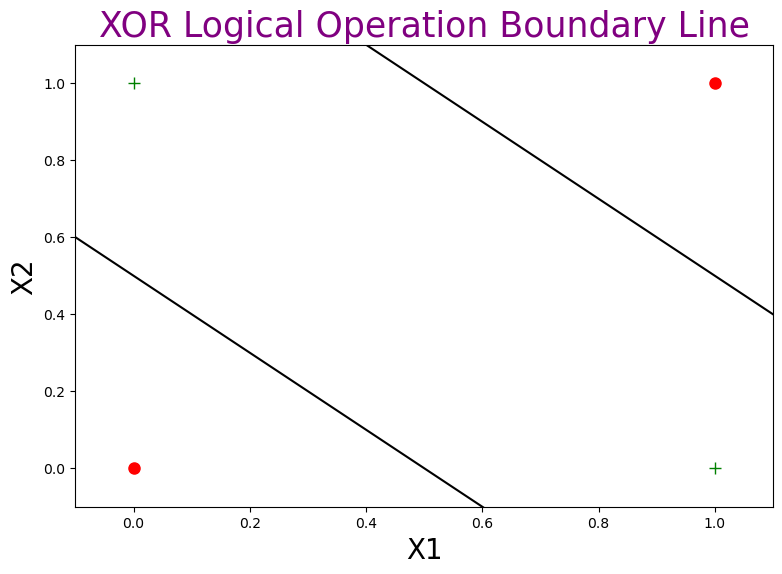

In [14]:
# Define the equations for the boundary lines
x1_line = np.linspace(-0.1, 1.5, 100)
x2_line1 = 0.50 - x1_line
x2_line2 = 1.50 - x1_line

# Plot the decision boundary lines
plt.figure(figsize=(9, 6))
plt.plot(x1_line, x2_line1, color="black")
plt.plot(x1_line, x2_line2, color="black")

# Plot the data points
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X[i, 0], X[i, 1], 'ro', markersize=8)
    else:
        plt.plot(X[i, 0], X[i, 1], '+g', markersize=8)

plt.xlabel("X1", size=20)
plt.ylabel("X2", size=20)
plt.title("XOR Logical Operation Boundary Line", size=25, color="purple")
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()